# SENTIMENT ANALYSIS ON TWEETS ABOUT CHATGPT

**DATASET:**
<br>The dataset being used to perform sentiment analysis on ChatGPT is taken from Kaggle 
(kaggle datasets download- [ pcminh0505/chatgpt-twitter](https://www.kaggle.com/datasets/pcminh0505/chatgpt-twitter?resource=download)). This dataset contains tweets about ChatGPT for a span of one month(30/11/2022 to 31/12/2022) obtained by Twitter API v2 for Academic Research. It consists of 11 columns namely: tweet_id, created_at, like_count, quote_count, reply_count, retweet_count, tweets, country, photo_url and city. The last 3 columns were dropped before reading the data. Since, in this project I am performing sentiment analysis, I will be overlooking all the columns and working on the "tweets".

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

In [14]:
data=pd.read_csv("C:/Users/anush/Downloads/archive (6)/chatgpt.csv")
data.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweets
0,1.600000e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...
1,1.600000e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh..."
2,1.600000e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...
3,1.600000e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ..."
4,1.600000e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne..."


In [15]:
#Checking for null values
data.isnull().sum()

tweet_id         0
created_at       0
like_count       0
quote_count      0
reply_count      0
retweet_count    0
tweets           0
dtype: int64

In [18]:
#Text pre-processing on the tweets to further perform sentiment analysis
stemmer = nltk.SnowballStemmer("english")

stopword=set(stopwords.words('english'))

def clean(tweets):
    tweets = str(tweets).lower()
    tweets = re.sub('\[.*?\]', '', tweets) #removes any text inside square brackets, including the brackets themselves
    tweets = re.sub('https?://\S+|www\.\S+', '', tweets) #removes URLs from the tweets
    tweets = re.sub('<.*?>+', '', tweets) #removes HTML tags
    tweets = re.sub('[%s]' % re.escape(string.punctuation), '', tweets) #removes punctuation marks 
    tweets = re.sub('\n', '', tweets) #removes newline characters
    tweets = re.sub('\w*\d\w*', '', tweets) #removes alphanumeric words
    tweets = [word for word in tweets.split(' ') if word not in stopword]
    tweets=" ".join(tweets)
    tweets= [stemmer.stem(word) for word in tweets.split(' ')] #converts words to their root form
    tweets=" ".join(tweets)
    return tweets
data["tweets"] = data["tweets"].apply(clean)

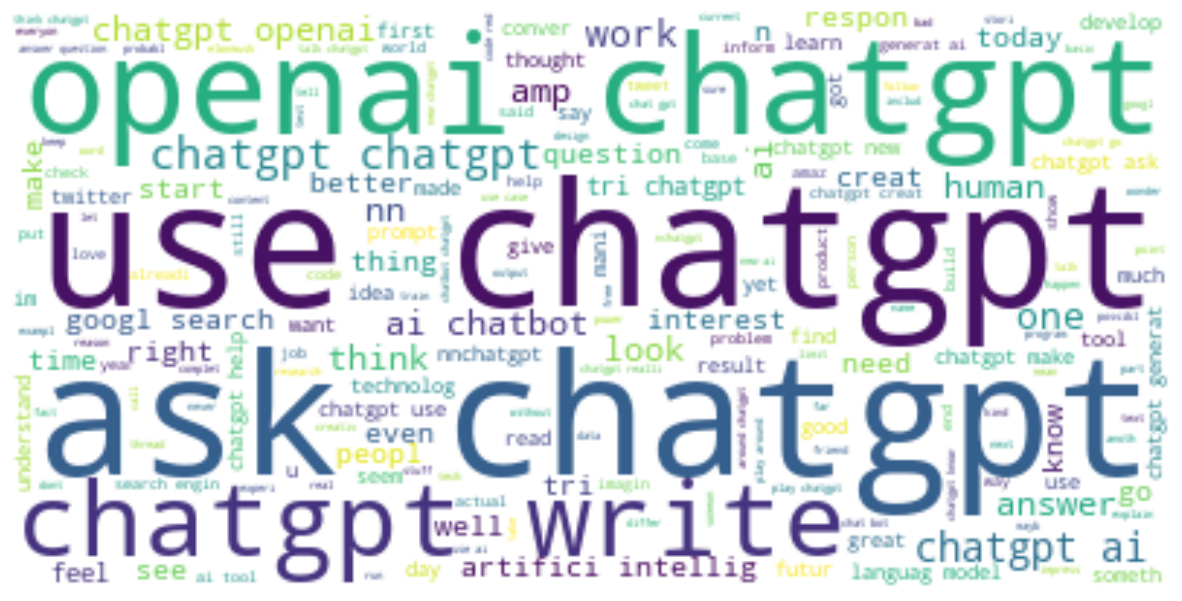

In [19]:
#Word cloud visualization based on the pre-processed text data
tweets = " ".join(i for i in data.tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tweets)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
#Sentiment analysis on the "tweets" column of a DataFrame named "data" 
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweets"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweets"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweets"]]
#Adding three new columns: "Positive", "Negative", and "Neutral"
data = data[["tweets", "Positive", "Negative", "Neutral"]]
print(data.head())

                                              tweets  Positive  Negative  \
0        chatgpt optim languag model dialogu  openai     0.000       0.0   
1  tri talk chatgpt new ai system optim dialogu f...     0.197       0.0   
2  chatgpt optim languag model dialogu  ai machin...     0.000       0.0   
3  thrill share chatgpt new model optim dialog pu...     0.500       0.0   
4   minut ago openai releas new chatgpt nnand use...     0.000       0.0   

   Neutral  
0    1.000  
1    0.803  
2    1.000  
3    0.500  
4    1.000  


In [21]:
#Comparing the score of each sentiment to draw a conclusion regarding the most prevalent sentiment in context of ChatGPT
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("The overall sentiment observed is Positive")
    elif (b>a) and (b>c):
        print("The overall sentiment observed is Negative")
    else:
        print("The overall sentiment observed is Neutral")
sentiment_score(x, y, z)

The overall sentiment observed is Neutral


In [22]:
#Total score of each sentiment
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  25791.80699999843
Negative:  11842.514999999723
Neutral:  181636.75799999695


The overall sentiment observed from the data under consideration neutral towards ChatGPT. On comparing the positive and negative sentiment, we can see that the positive sentiment overpowers the negative. Thus, in totality we can say that most opinions on ChatGPT are positive.